# Pymaceuticals Inc.

## Analysis

### After testing the ten drugs in question on our sample of mice, we have come to the conclusion that Capomulin and Ramicane were the most effective at reducing the size of tumors. Their mean and median tumor sizes at the end of the study were considerably smaller than those of the other eight drugs tested.

### We have also seen a noticeable correlation between average tumor volume and the weight of mice. Mice that weigh more seem to have larger tumor sizes than their lighter counterparts. This is a strong correlation that should be highlighted.

### Below are our findings in more depth.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
unique_mice = combined_data["Mouse ID"].unique()
mouse_count = len(unique_mice)
mouse_count

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
combined_data[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Get all the data for the duplicate mouse ID.
g989_df = combined_data[(combined_data["Mouse ID"] == "g989")]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.drop(combined_data[(combined_data["Mouse ID"] == "g989")].index)
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check the number of mice in the clean DataFrame.
unique_mice = combined_data["Mouse ID"].unique()
mouse_count = len(unique_mice)
mouse_count

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_by_drug_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_by_drug_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_by_drug_var = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_by_drug_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_by_drug_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
tumor_by_drug_summary = pd.DataFrame({"Mean Tumor Volume": tumor_by_drug_mean, "Median Tumor Volume": tumor_by_drug_median, 
                                      "Tumor Volume Variance": tumor_by_drug_var, "Tumor Volume Std. Dev.": tumor_by_drug_std, 
                                      "Tumor Volume Std. Err.": tumor_by_drug_sem})

# Display the summary DataFrame
tumor_by_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_by_drug_agg_summary = combined_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": 
                                                                         ["mean", "median", "var", "std", "sem"]})
tumor_by_drug_agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

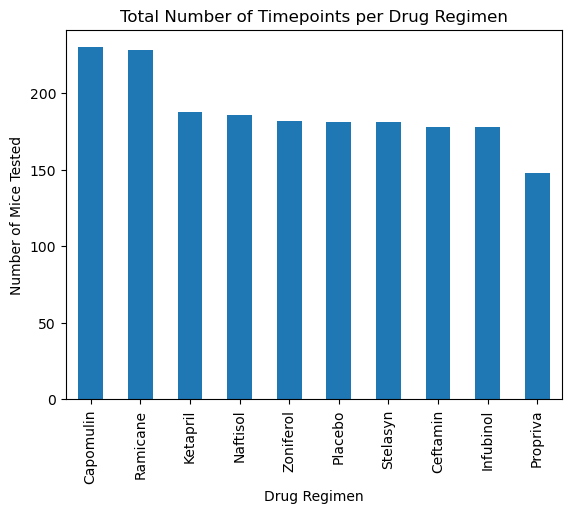

In [9]:
# Group by "Drug Regimen" and count how many times mice have been tested with that drug (in descending order).
mice_tested = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested.plot(kind = "bar", ylabel = "Number of Mice Tested", title = "Total Number of Timepoints per Drug Regimen")
plt.show()

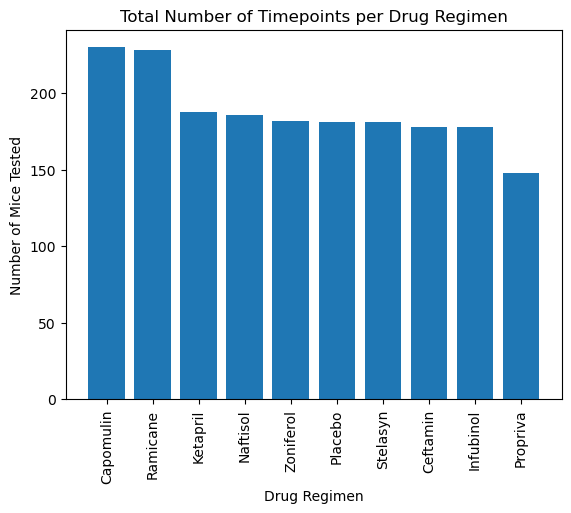

In [10]:
# Create a list of the drug names from above in descending order that will be used for the x-axis in the pyplot bar plot.
drugs = mice_tested.index

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs, mice_tested, align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Timepoints per Drug Regimen")
plt.show()

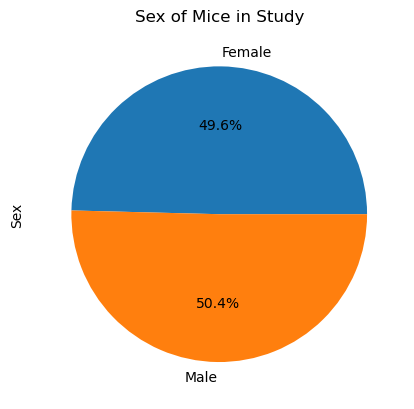

In [11]:
# Create a DataFrame with only the last instance of each unique mouse shown. This removes possible issues with Timepoints when
# trying to figure out the distribution of male versus female mice in the study.
unique_mice_df = combined_data.drop_duplicates(["Mouse ID"], keep="last").reset_index(drop=True)

# Generate a pie plot showing the distribution of female versus male mice using Pandas.
unique_mice_df.groupby(["Sex"]).count().plot(kind = "pie", y = "Mouse ID", autopct = "%1.1f%%", ylabel = "Sex", legend = False, 
                                            title = "Sex of Mice in Study")
plt.show()

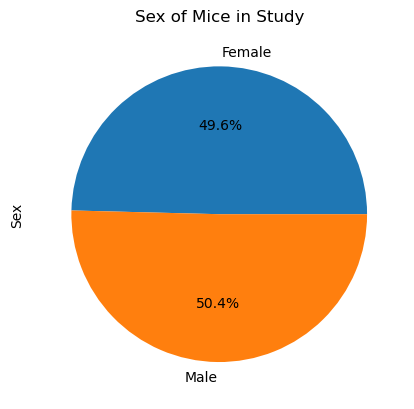

In [12]:
# Get the total number of male mice in the study.
male_count = unique_mice_df[(unique_mice_df["Sex"] == "Male")].count()["Mouse ID"]

# Get the total number of female mice in the study.
female_count = unique_mice_df[(unique_mice_df["Sex"] == "Female")].count()["Mouse ID"]

# Set the values for the sections of the pie chart.
sizes = [female_count, male_count]

# Label the sections.
labels = ["Female", "Male"]

# Generate a pie plot showing the distribution of female versus male mice using pyplot.
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.title("Sex of Mice in Study")
plt.show()

## Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# ("unique_mice_df" from the Pie Charts portion already has the last (greatest) timepoint for each mouse.)


# Only include the four mentioned drugs in the DataFrame.
four_drug_summary = unique_mice_df[(unique_mice_df["Drug Regimen"] == "Capomulin") | (unique_mice_df["Drug Regimen"] == "Ramicane") | 
                                   (unique_mice_df["Drug Regimen"] == "Infubinol") | (unique_mice_df["Drug Regimen"] == "Ceftamin")]

# Rename Tumor Volume and Timepoint columns to reflect that they are the final counts.
four_drug_summary = four_drug_summary.rename(columns = {"Tumor Volume (mm3)": "Final Tumor Volume (mm3)", 
                                                        "Timepoint": "Last Timepoint"})

# Condense the "four_drug_summary" to only include these three columns, since the other columns are going to be the same as
# the columns in the DataFrame below (the two DataFrames will eventually be merged).
four_drug_summary = four_drug_summary[["Mouse ID", "Last Timepoint", "Final Tumor Volume (mm3)"]]

# Create a DataFrame with each mouse's starting points and only include the four mentioned drugs in the DataFrame.
starting_timepoint = combined_data.drop_duplicates(["Mouse ID"], keep="first").reset_index(drop=True)
starting_four_drug_summary = starting_timepoint[(starting_timepoint["Drug Regimen"] == "Capomulin") | (starting_timepoint["Drug Regimen"] == "Ramicane") | 
                                   (starting_timepoint["Drug Regimen"] == "Infubinol") | (starting_timepoint["Drug Regimen"] == "Ceftamin")]

# Rename Tumor Volume and Timepoint columns to reflect that they are the starting counts.
starting_four_drug_summary = starting_four_drug_summary.rename(columns = {"Tumor Volume (mm3)": "Starting Tumor Volume (mm3)", 
                                                                          "Timepoint": "First Timepoint"})

# Merge the two DataFrames to get the starting and finishing datapoints for each mouse within the four drugs context.
start_finish_df = pd.merge(starting_four_drug_summary, four_drug_summary, how="left", on=["Mouse ID"])
start_finish_df.head()

,Mouse ID,First Timepoint,Starting Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Final Tumor Volume (mm3)
0,b128,0,45.0,0,Capomulin,Female,9,22,45,38.982878
1,c326,0,45.0,0,Infubinol,Female,18,25,5,36.321346
2,c139,0,45.0,0,Infubinol,Male,11,28,45,72.226731
3,v339,0,45.0,0,Infubinol,Male,20,26,5,46.250112
4,a577,0,45.0,0,Infubinol,Female,6,25,30,57.031862


In [14]:
# Put treatments into a list.
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list for each drug to fill with tumor volume outlier data.
capomulin_outliers = []
ramicane_outliers = []
infubinol_outliers = []
ceftamin_outliers = []

# Locate the rows which contain mice on each drug.
capomulin_df = start_finish_df[start_finish_df["Drug Regimen"] == "Capomulin"]
ramicane_df = start_finish_df[start_finish_df["Drug Regimen"] == "Ramicane"]
infubinol_df = start_finish_df[start_finish_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = start_finish_df[start_finish_df["Drug Regimen"] == "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles_1 = capomulin_df["Final Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_1 = quartiles_1[0.25]
upperq_1 = quartiles_1[0.75]
iqr_1 = upperq_1 - lowerq_1 
lower_bound_1 = lowerq_1 - (1.5 * iqr_1)
upper_bound_1 = upperq_1 + (1.5 * iqr_1)

quartiles_2 = ramicane_df["Final Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2 - lowerq_2 
lower_bound_2 = lowerq_2 - (1.5 * iqr_2)
upper_bound_2 = upperq_2 + (1.5 * iqr_2)

quartiles_3 = infubinol_df["Final Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3 - lowerq_3 
lower_bound_3 = lowerq_3 - (1.5 * iqr_3)
upper_bound_3 = upperq_3 + (1.5 * iqr_3)

quartiles_4 = ceftamin_df["Final Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_4 = quartiles_4[0.25]
upperq_4 = quartiles_4[0.75]
iqr_4 = upperq_4 - lowerq_4 
lower_bound_4 = lowerq_4 - (1.5 * iqr_4)
upper_bound_4 = upperq_4 + (1.5 * iqr_4)

# Determine outliers using upper and lower bounds.
for i in capomulin_df["Final Tumor Volume (mm3)"]:
    if (i < lower_bound_1) | (i > upper_bound_1):
        capomulin_outliers.append(i)
        
for i in ramicane_df["Final Tumor Volume (mm3)"]:
    if (i < lower_bound_2) | (i > upper_bound_2):
        ramicane_outliers.append(i)
        
for i in infubinol_df["Final Tumor Volume (mm3)"]:
    if (i < lower_bound_3) | (i > upper_bound_3):
        infubinol_outliers.append(i)
        
for i in ceftamin_df["Final Tumor Volume (mm3)"]:
    if (i < lower_bound_4) | (i > upper_bound_4):
        ceftamin_outliers.append(i)

# Print out all the possible outliers for each drug.
print(f"Capomulin's potential outliers: {capomulin_outliers}")
print(f"Ramicane's potential outliers: {ramicane_outliers}")
print(f"Infubinol's potential outliers: {infubinol_outliers}")
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


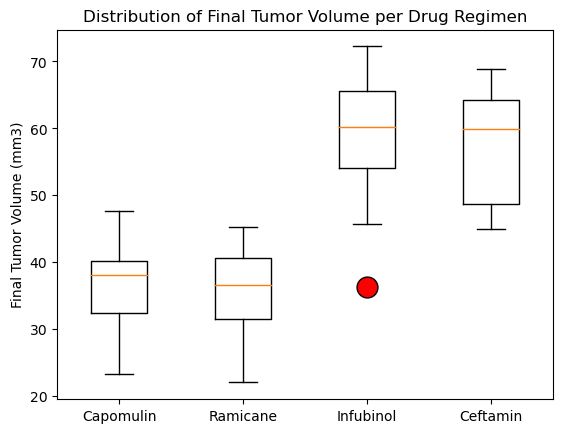

In [15]:
# Define red_circle, which will be used for outlier formatting when plotting the box plot below.
red_circle = dict(markerfacecolor = "red", marker = "o", markersize = "15")

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin_df["Final Tumor Volume (mm3)"], ramicane_df["Final Tumor Volume (mm3)"], 
             infubinol_df["Final Tumor Volume (mm3)"], ceftamin_df["Final Tumor Volume (mm3)"]], flierprops=red_circle)

# Change the x-axis ticks to refelct the names of the four treatment groups.
plt.xticks([1, 2, 3, 4], drugs_list)

# Add title to the plot.
plt.title("Distribution of Final Tumor Volume per Drug Regimen")

# Show box plot.
plt.show()


# Line and Scatter Plots

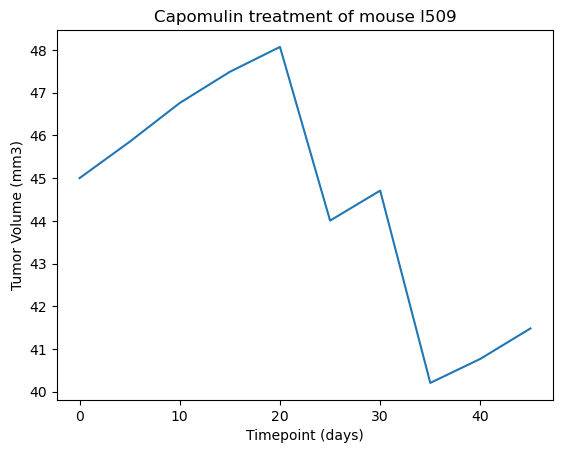

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = combined_data[combined_data["Mouse ID"] == "l509"]
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

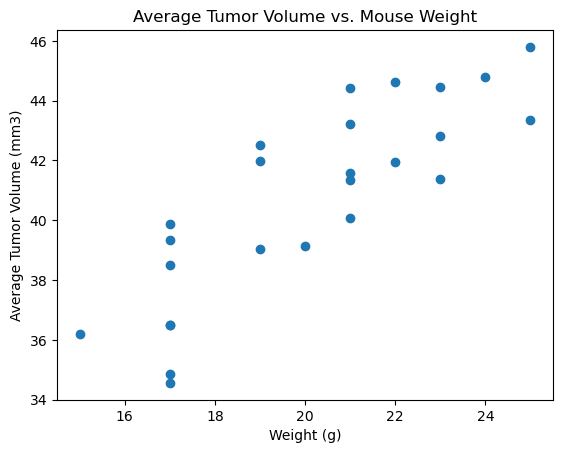

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

# Condense "combined_data" into a DataFrame that only lists mice treated with Capomulin.
combined_data_capomulin = combined_data[(combined_data['Drug Regimen']=="Capomulin")]

# Create the x and y values for our scatter plot. x = mouse weight and y = average tumor volume.
weight_capomulin = combined_data_capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
tumor_vol_capomulin = combined_data_capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

# Generate and show scatter plot.
plt.scatter(weight_capomulin, tumor_vol_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


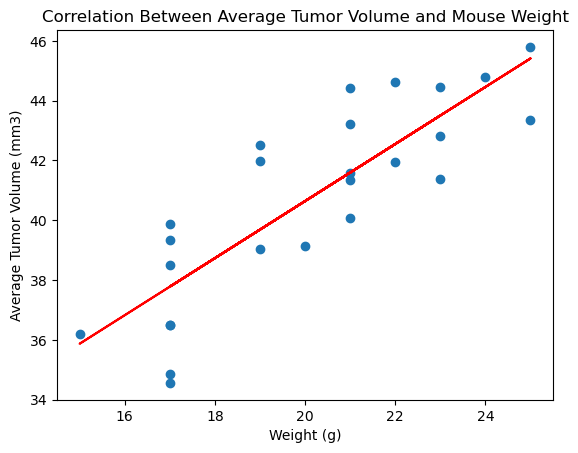

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

# Correlation coefficient.
correlation = st.pearsonr(weight_capomulin, tumor_vol_capomulin)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Linear regression model.
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_capomulin, tumor_vol_capomulin)
regress_values = weight_capomulin * slope + intercept
plt.scatter(weight_capomulin, tumor_vol_capomulin)
plt.plot(weight_capomulin,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation Between Average Tumor Volume and Mouse Weight")
plt.show()